In [22]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeCV
import numpy as np
import os
import sys
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
#import other python scripts for further anlaysis
import reshape
import plotFW
import results
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
taskFC=reshape.matFiles(dataDir+'motor/MSC03_parcel_corrmat.mat')
restFC=reshape.matFiles(dataDir+'rest/MSC03_parcel_corrmat.mat')

taskSize=taskFC.shape[0]
restSize=restFC.shape[0]
t = np.ones(taskSize, dtype = int)
r=np.zeros(restSize, dtype=int)
#x_train, y_train=reshape.concateFC(taskFC, restFC)
#clf=RidgeClassifier()
clf=LinearSVC()

test_taskFC=reshape.matFiles(dataDir+'motor/MSC04_parcel_corrmat.mat')
test_restFC=reshape.matFiles(dataDir+'rest/MSC04_parcel_corrmat.mat')

In [23]:
loo = LeaveOneOut()
taskSize=taskFC.shape[0]
restSize=restFC.shape[0]
t = np.ones(taskSize, dtype = int)
r=np.zeros(restSize, dtype=int)
tmpdf=pd.DataFrame()
acc_scores_per_fold=[]
for train_index, test_index in loo.split(taskFC):
    Xtrain_rest, Xtest_rest=restFC[train_index], test_restFC[test_index]
    Xtrain_task, Xtest_task=taskFC[train_index], test_taskFC[test_index]

    
    ytrain_rest, ytest_rest=r[train_index], r[test_index]
    ytrain_task, ytest_task=t[train_index], t[test_index]
    
    X_tr=np.concatenate((Xtrain_task, Xtrain_rest))
    y_tr = np.concatenate((ytrain_task,ytrain_rest))
    
    X_Test = np.concatenate((Xtest_task, Xtest_rest))
    y_Test = np.concatenate((ytest_task,ytest_rest))
    clf.fit(X_tr,y_tr)
            #test set
    clf.predict(X_Test)
            #Get accuracy of model
    ACCscores=clf.score(X_Test,y_Test)
    acc_scores_per_fold.append(ACCscores)
tmpdf['folds']=acc_scores_per_fold
score=tmpdf['folds'].mean()

In [8]:
#x_test, y_test=reshape.concateFC(test_taskFC, test_restFC)
#okay so if I wanted to do LOOCV   
loo = LeaveOneOut()
tmpdf=pd.DataFrame()
acc_scores_per_fold=[]
for train_index, test_index in loo.split(taskFC):
    #initializing split of training set for CV
    #print("TRAIN:", train_index, "TEST:", test_index)
    #X_tr, X_te = x_train[train_index], x_train[test_index]
    #y_tr, y_te = y_train[train_index], y_train[test_index]
    #split up the test set
    #X_Test=x_test[test_index]
    #y_Test=y_test[test_index]
    
    ##################################
    #first we need to split up the rest and two tasks so that we're still testing on a rest
    print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain_rest, Xtest_rest=restFC[train_index], restFC[test_index]
    Xtrain_task=taskFC[train_index]
    Xtest_task=test_taskFC[test_index]
    
    ytrain_rest, ytest_rest=r[train_index], r[test_index]
    ytrain_task, ytest_task=t[train_index], t[test_index]
    
    X_tr=np.concatenate((Xtrain_task, Xtrain_rest))
    y_tr = np.concatenate((ytrain_task,ytrain_rest))
    
    X_Test = np.concatenate((Xtest_task, Xtest_rest))
    y_Test = np.concatenate((ytest_task,ytest_rest))
    clf.fit(X_tr,y_tr)
    #test set
    clf.predict(X_Test)
    #Get accuracy of model
    ACCscores=clf.score(X_Test,y_Test)
    acc_scores_per_fold.append(ACCscores)
df['validation_set']=acc_scores_per_fold

TRAIN: [1 2 3 4 5 6 7 8 9] TEST: [0]
TRAIN: [0 2 3 4 5 6 7 8 9] TEST: [1]
TRAIN: [0 1 3 4 5 6 7 8 9] TEST: [2]
TRAIN: [0 1 2 4 5 6 7 8 9] TEST: [3]
TRAIN: [0 1 2 3 5 6 7 8 9] TEST: [4]
TRAIN: [0 1 2 3 4 6 7 8 9] TEST: [5]
TRAIN: [0 1 2 3 4 5 7 8 9] TEST: [6]
TRAIN: [0 1 2 3 4 5 6 8 9] TEST: [7]
TRAIN: [0 1 2 3 4 5 6 7 9] TEST: [8]
TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [9]


In [13]:
score=df['validation_set'].mean()

In [14]:
score

0.6

In [24]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:

from sklearn.model_selection import LeaveOneOut
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
import numpy as np
import os
import sys
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
#import other python scripts for further anlaysis
import reshape
import plotFW
import results
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mL/'
# Subjects and tasks
taskList=['mixed', 'motor','mem']
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
#all possible combinations of subs and tasks
subsComb=(list(itertools.permutations(subList, 2)))
tasksComb=(list(itertools.permutations(taskList, 2)))
#DS combination
DSvars=list(itertools.product(list(subsComb),list(taskList)))
##SS combination
SSvars=list(itertools.product(list(subList),list(tasksComb)))
#BS combination
BSvars=list(itertools.product(list(subsComb),list(tasksComb)))


""" run_prediction initializes what type of analysis you would like to do
and what classifier you would like to use. For now classifier options are svm:linear svm, logreg: logistic
regression, and ridge:ridge regression. Analysis is the type of analysis you wanted
to run. DS--different subject same task; SS--same subject different task;
BS--different subject different task. Each analysis will concatenate across
subjects and make a dataframe. If FW is true will collect all necessary feature weights and plot or save then
into the appropriate format. """
def run_prediction(classifier, analysis):
    if analysis=='CV':
        classifyCV(classifier, analysis)
    elif analysis=='DS':
        classifyDS(classifier, analysis)
    elif analysis=='SS':
        classifySS(classifier, analysis)
    elif analysis=='BS':
        classifyBS(classifier, analysis)
    else:
        print('did not specify analysis')
def classifyDS(classifier, analysis):
    acc_scores_per_task=[]
    tmp_df=pd.DataFrame(DSvars, columns=['sub','task'])
    dfDS=pd.DataFrame()
    dfDS[['train_sub','test_sub']]=pd.DataFrame(tmp_df['sub'].tolist())
    dfDS['task']=tmp_df['task']
    for index, row in dfDS.iterrows():
        score=model(classifier, analysis, train_sub=row['train_sub'], test_sub=row['test_sub'], train_task=row['task'], test_task=row['task'])
        acc_scores_per_task.append(score)
    dfDS['acc']=acc_scores_per_task
    results.plotACC(dfDS, classifier, analysis)
    results.statsACC(dfDS, classifier, analysis)
    results.boxACC(dfDS, classifier, analysis)
    dfDS.to_csv(outDir+'results/'+classifier+'/acc/'+analysis+'/acc.csv', index=False)
def classifySS(classifier,analysis):
    acc_scores_per_task=[]
    tmp_df=pd.DataFrame(SSvars, columns=['sub','task'])
    dfSS=pd.DataFrame()
    dfSS[['train_task','test_task']]=pd.DataFrame(tmp_df['task'].tolist())
    dfSS['sub']=tmp_df['sub']
    for index, row in dfSS.iterrows():
        score=model(classifier, analysis, train_sub=row['sub'], test_sub=row['sub'], train_task=row['train_task'], test_task=row['test_task'])
        acc_scores_per_task.append(score)
    dfSS['acc']=acc_scores_per_task
    results.plotACC(dfSS, classifier, analysis)
    results.statsACC(dfSS, classifier, analysis)
    results.boxACC(dfSS, classifier, analysis)
    #save accuracy
    dfSS.to_csv(outDir+'results/'+classifier+'/acc/'+analysis+'/acc.csv', index=False)
def classifyBS(classifier, analysis):
    acc_scores_per_task=[]
    tmp_df=pd.DataFrame(BSvars, columns=['sub','task'])
    dfBS=pd.DataFrame()
    dfBS[['train_task','test_task']]=pd.DataFrame(tmp_df['task'].tolist())
    dfBS[['train_sub', 'test_sub']]=pd.DataFrame(tmp_df['sub'].tolist())
    for index, row in dfBS.iterrows():
        score=model(classifier, analysis, train_sub=row['train_sub'], test_sub=row['test_sub'], train_task=row['train_task'], test_task=row['test_task'])
        acc_scores_per_task.append(score)
    dfBS['acc']=acc_scores_per_task
    results.plotACC(dfBS, classifier, analysis)
    results.statsACC(dfBS, classifier, analysis)
    results.boxACC(dfBS, classifier, analysis)
    #save accuracy
    dfBS.to_csv(outDir+'results/'+classifier+'/acc/'+analysis+'/acc.csv', index=False)
    
    
def model(classifier, analysis, train_sub, test_sub, train_task, test_task):
    if classifier=='SVC':
        clf=LinearSVC()
    elif classifier=='logReg':
        clf=LogisticRegression(solver = 'lbfgs')
    elif classifier=='ridge':
        clf=RidgeClassifier()
    else:
        print('Error: You didnt specify what classifier')
    taskFC=reshape.matFiles(dataDir+train_task+'/'+train_sub+'_parcel_corrmat.mat')
    restFC=reshape.matFiles(dataDir+'rest/'+train_sub+'_parcel_corrmat.mat')
    #if your subs are the same 
    if train_sub==test_sub:
        test_taskFC=reshape.matFiles(dataDir+test_task+'/'+test_sub+'_parcel_corrmat.mat')
        ACCscores=CV_folds(clf, analysis, taskFC, restFC, test_taskFC, restFC)
    else:
        test_taskFC=reshape.matFiles(dataDir+test_task+'/'+test_sub+'_parcel_corrmat.mat')
        test_restFC=reshape.matFiles(dataDir+'rest/'+test_sub+'_parcel_corrmat.mat')
        ACCscores=CV_folds(clf, analysis, taskFC, restFC, test_taskFC, test_restFC)
    return ACCscores
#Calculate acc of cross validation within sub within task
def classifyCV(classifier, analysis):
    avg_CV=[]
    if classifier=='SVC':
        clf=LinearSVC()
    elif classifier=='logReg':
        clf=LogisticRegression(solver = 'lbfgs')
    elif classifier=='ridge':
        clf=RidgeClassifier()
    else:
        print('invalid classifier')
    for task in taskList:
        acc_scores_per_task=[]
        cvTable=[]
        for sub in subList:
            taskFC=reshape.matFiles(dataDir+task+'/'+sub+'_parcel_corrmat.mat')
            restFC=reshape.matFiles(dataDir+'rest/'+sub+'_parcel_corrmat.mat')
            folds=taskFC.shape[0]
            x_train, y_train=reshape.concateFC(taskFC, restFC)
            CVscores=cross_val_score(clf, x_train, y_train, cv=folds)
            mu=CVscores.mean()
            acc_scores_per_task.append(mu)
            cv_tmp_df=pd.DataFrame({sub:CVscores})
            cvTable.append(cv_tmp_df)
    #acc per fold per sub
        tmp_df=pd.DataFrame({'sub':subList, task:acc_scores_per_task}).set_index('sub')
        avg_CV.append(tmp_df)
        cvTable=pd.concat(cvTable, axis=1)
    #saving cv per folds if debugging
        cvTable.to_csv(outDir+'results/'+classifier+'/acc/'+analysis+'/cvTable_folds.csv', index=False)
    #average acc per sub per tasks
    df=pd.concat(avg_CV, axis=1)
    results.plotACC(df, classifier, analysis)
    results.statsACC(df, classifier, analysis)
    results.boxACC(df, classifier, analysis)
    df.to_csv(outDir+'results/'+classifier+'/acc/'+analysis+'/acc.csv')
    
def CV_folds(clf, analysis, taskFC, restFC, test_taskFC, test_restFC):
    loo = LeaveOneOut()
    taskSize=taskFC.shape[0]
    restSize=restFC.shape[0]
    t = np.ones(taskSize, dtype = int)
    r=np.zeros(restSize, dtype=int)
    if analysis=='SS':
        tmpdf=pd.DataFrame()
        acc_scores_per_fold=[]
        for train_index, test_index in loo.split(taskFC):
            Xtrain_rest, Xtest_rest=restFC[train_index], restFC[test_index]
            Xtrain_task, Xtest_task=taskFC[train_index], test_taskFC[test_index]
    
            ytrain_rest, ytest_rest=r[train_index], r[test_index]
            ytrain_task, ytest_task=t[train_index], t[test_index]
    
            X_tr=np.concatenate((Xtrain_task, Xtrain_rest))
            y_tr = np.concatenate((ytrain_task,ytrain_rest))
    
            X_Test = np.concatenate((Xtest_task, Xtest_rest))
            y_Test = np.concatenate((ytest_task,ytest_rest))
            clf.fit(X_tr,y_tr)
            #test set
            clf.predict(X_Test)
            #Get accuracy of model
            ACCscores=clf.score(X_Test,y_Test)
            acc_scores_per_fold.append(ACCscores)
        tmpdf['folds']=acc_scores_per_fold
        score=tmpdf['folds'].mean()
        
    else:
        tmpdf=pd.DataFrame()
        acc_scores_per_fold=[]
        for train_index, test_index in loo.split(taskFC):
            Xtrain_rest, Xtest_rest=restFC[train_index], test_restFC[test_index]
            Xtrain_task, Xtest_task=taskFC[train_index], test_taskFC[test_index]
    
            ytrain_rest, ytest_rest=r[train_index], r[test_index]
            ytrain_task, ytest_task=t[train_index], t[test_index]
    
            X_tr=np.concatenate((Xtrain_task, Xtrain_rest))
            y_tr = np.concatenate((ytrain_task,ytrain_rest))
    
            X_Test = np.concatenate((Xtest_task, Xtest_rest))
            y_Test = np.concatenate((ytest_task,ytest_rest))
            clf.fit(X_tr,y_tr)
            #test set
            clf.predict(X_Test)
            #Get accuracy of model
            ACCscores=clf.score(X_Test,y_Test)
            acc_scores_per_fold.append(ACCscores)
        tmpdf['folds']=acc_scores_per_fold
        score=tmpdf['folds'].mean()
        
    return score
    

subject by subject heatmap


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


FileNotFoundError: [Errno 2] No such file or directory: '/Users/Alexis/Desktop/MSC_Alexis/analysis/output/mLdoubleRest/images/SVC/acc/DS/mixed_heatmap.png'

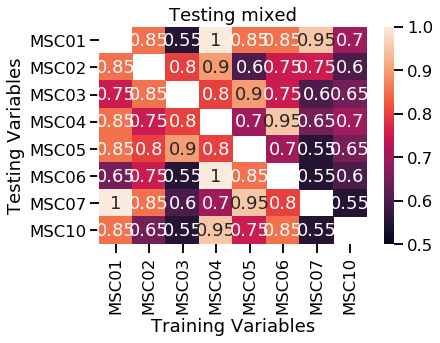

In [25]:
classifyDS(classifier='SVC',analysis='DS')